# Astronomy 16 - Spring 2019
## Homework 2,  Allison Culbert, 2/12/19
### A. Closed Quadratures
The first part of this assignment evaluates integrals using multiple different tecniques. The integral being assesed is: $\int_{0}^{\pi /2}sin^{2m-1}\theta cos^{2n-1}\theta d\theta = \int_{0}^{\pi /2}f(x)dx$
#### *(i)* Analytical Approach
The integral can be solved analytcally using the properties:
+ $\int cos^{m}\theta sin^{n}\theta d\theta = \frac{cos^{m-1}\theta sin^{n+1}\theta }{m+n} + \frac{m-1}{m+n} \int cos^{m-2}\theta sin^{n}\theta d\theta$
+ $\int cos\theta sin^{m}\theta d\theta = \frac{sin^{m+1}\theta }{m+1}$

When m = 2 and n = 4, the integral evaluated from 0 to $\frac{\pi}{2}$ is equvalent to 0.025.

#### *(ii)* Plotting f(x)
In order to plot the function, modules must be imported that provide essenital functions for plotting.

In [34]:
# importing matplotlib.pyplot and numpy
import matplotlib.pyplot as plt
import numpy as np
import warnings
#warnings.filterwarnings("ignore")

# Setting m and n values for f(x)
m = 2
n = 4

f(x) is defined as given above.

In [35]:
# f(x)
# parameters: an integer x value
# returns: an ineger f(x) value
def f(x):
    return(((np.sin(x))**((2*m)-1))*((np.cos(x))**((2*n)-1)))

f(x) is plotted from 0 to $\frac{\pi}{2}$

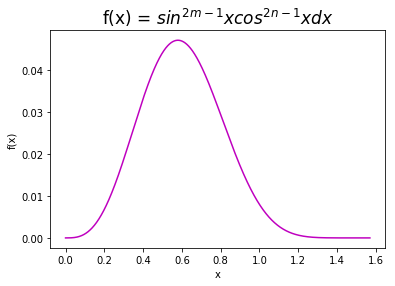

In [36]:
# Choosing x values for function
xvals = np.arange(0, np.pi/2, 0.001)

# plotting x by f(x)
plt.plot(xvals, f(xvals), c = "m")
plt.title("f(x) = $sin^{2m-1}xcos^{2n-1}xdx$", fontsize = 17)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

#### *(iii)* Trapezoidal Extended Closed Formula
The Trapezoidal Extended Closed Formula evaluates an integral by splitting the function into n intervals, and adding up the area of the trapezoids that the pairs of adjacent intervals create. Its general form is: 

${\int _{a}^{b}f(x)\,dx\approx {\tfrac {\Delta x}{2}}\left(f(x_{0})+2f(x_{1})+2f(x_{2})+2f(x_{3})+2f(x_{4})+\cdots +2f(x_{n-1})+f(x_{n})\right)}$

where ${\Delta x={\frac {b-a}{n}}}$ and $x_{i}=a+i\Delta x $.

The following function, trap_ext, is an implementation of this formula:

In [96]:
# trap_ext: a python implementation of the Trapezoidal Extended 
#           Closed Formula
# parameters: two boundary integers, an integer number of partitions,
#             a function to be evaluated
# returns: an approximate solution to the integral
def trap_ext(a, b, n, g):
    if n <= 1:
        print("N must be > 1")
        return
    y = 0
    h = (b-a)/(n)
    for c in range(n+1):
        if c == 0:
            y += g(a)
        elif c == n:
            y += g(b)
        else:
            y += (2*g(a+(c*h)))
    return ((y*h)/2)

In [117]:
print(trap_ext(0, (np.pi/2), 100, f))

0.025000000507577596


#### *(iv)* Simpson's Extended Closed Formula
Simpson's extended closed formula is a method to evaluate integrals using n subdivisions of an interval between points a and b. It can be constructed from the trapezoidal rule and the midpoint rule. Its general form is:
$ \int _{a}^{b}f(x)\,dx\approx {\tfrac {\Delta x}{3}}\left(f(x_{0})+4f(x_{1})+2f(x_{2})+4f(x_{3})+2f(x_{4})+\cdots +4f(x_{n-1})+f(x_{n})\right) $

where ${\Delta x={\frac {b-a}{n}}}$ and $x_{i}=a+i\Delta x $.

The following is an implementation of Simpson's Extended Closed Formula:

In [113]:
# simp_ext: a python implementation of the Simpson's Extended Closed
#           Formula
# parameters: two boundary integers, an integer number of partitions,
#             a function to be evaluated
# returns: an approximate solution to the integral
def simp_ext(a, b, n, g):
    if n <= 0:
        print("N must be > 0")
        return
    y = 0
    h = (b-a)/(n)
    for c in range(n+1):
        if c == 0:
            y += g(a)
        elif c == n:
            y += g(b)
        elif (c % 2) != 0:
            y += (4*(g(a+(c*h))))
        else:
            y += (2*(g(a+(c*h))))
    return ((y*h)/3)

In [114]:
print(simp_ext(0, (np.pi/2), 10, f))

0.0249735012277838


#### *(v)* Comparing results from *(iii)* and *(iv)*
An error function is defined that takes the absolute value of the difference between the actaul value of the integral and the approximated value of the integral using n subdivisions.

In [115]:
def err(x, j):
    y = []
    for a in range(x.size):
        a = 0.025-j(0, (np.pi/2), x[a], f)
        y.append(abs(a))
    return y

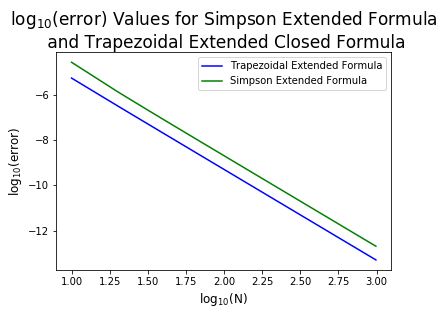

In [116]:
err_xvals = np.arange(10, 1000, 10)
plt.plot(np.log10(err_xvals), np.log10(err(err_xvals, trap_ext)), c="b")
plt.plot(np.log10(err_xvals), np.log10(err(err_xvals, simp_ext)), c="g")
plt.title("$\log_{10}$(error) Values for Simpson Extended Formula\n and Trapezoidal Extended Closed Formula", fontsize=17)
plt.xlabel("$\log_{10}$(N)", fontsize=12)
plt.ylabel("$\log_{10}$(error)", fontsize=12)
plt.legend(("Trapezoidal Extended Formula", "Simpson Extended Formula"), loc='upper right')
plt.show()

The plot above is interesting to me, in that it conveys that the Trapezoidal Extended Formula is more accurate for this function. I checked this multiple times, and could not find error with my approximation code. I also found other implementations of the approximation techniques on the internet ([here](https://stackoverflow.com/questions/16001157/simpsons-rule-in-python) and [here](https://stackoverflow.com/questions/21146540/trapezoidal-rule-in-python)), and those codes yielded the same result. My conclusion is either that for this function, the Trapezoidal Extended Formula is a better approximation than Simpson's (which I would be interested to understand why), or that there is a bug somewhere else in my code that I have not been able to find.

### B. Open Quadratics
Integral being evaluated: $\int_{0}^{\infty} \frac{x^{p-1}}{1+x}dx = \int_{0}^{\infty}f(x)dx$
#### *(i)* Analytical Evaluation

#### *(ii)* Plotting the Integral
To evaluate this integral between 0 and 1, the variables are changed to $ x = \frac{y}{1-y}$ and $ dx = \frac{dy}{(1-y)^{2}} $ to rewrite the integral as $\int_{0}^{1}f(y)dy $

In [141]:
p = 0.5
def h(y):
#     x = y/(1-y)
#     dx = 1/((1-y)**2)
#     hx = (x**(p-1))/(1+x)
#     return (hx*dx)
    fx = (((y/(1-y))**(p-1))/(1+(y/(1-y))))*(1/((1-y)**2))
    return fx

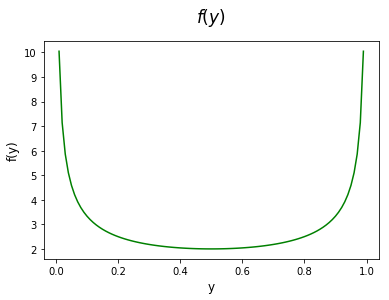

In [145]:
yvals = np.arange(0, 1, 0.01)
plt.plot(yvals, h(yvals), c = "green")
plt.title("$f(y)$", fontsize = 17, y=1.06)
plt.xlabel("y", fontsize=12)
plt.ylabel("f(y)", fontsize=12)
plt.show()

In [148]:
def ext_open(a, b, g, n):
    h = (b-a)/n
    y = 0
    y += ((55/24)*(g(a+(2*h))))
    print(y)
    y -= (1/6)*(g(a+(3*h)))
    print(y)
    y += (11/8)*(g(a+(4*h)))
    print(y)
    for i in range(5, n-3):
        y += g(a+(i*h))
    y += (11/8)*(g(a+((n-3)*h)))
    y -= (1/6)*(g(a+((n-2)*h)))
    print(y)
    y += (55/24)*g(a+((n-1)*h))
    return y

In [149]:
print(ext_open(0, 1, h, 100))

16.369047619047617
15.392030316113368
22.408797808461014
262.99630001014515
286.0284166098354
